In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [24]:
dados = pd.DataFrame({
                      "primeira gravação": np.array([20.2,4.62,1.34,.4,0.15,.07,.04,.03,.02,.01]),
                      "segunda gravação": np.array([20.2,5.02,1.29,.41,.15,.07,.04,.02,.02,0.01]),
                      "terceira gravação": np.array([20.2,4.87,1.3,.42,.15,.08,.04,.03,.02,.01]),
                      "quarta gravação": np.array([20.2,4.74,1.31,.39,.14,.07,.04,.02,.02,.01]),
                      "quinta gravação": np.array([20.2,5.18,1.3,.39,.15,.07,.04,.02,.02,.01])},
                      index = [0,12,24,36,48,60,72,84,96,108])

dados
tempo = np.array([[0,12,24,36,48,60,72,84,96,108]]).T

In [46]:
media = dados.mean(axis=1) # faz a operação para cada linhas

In [54]:
#deixa os index normais
media.index = np.array(range(10))

4.886

In [26]:
dados.std(axis=1)

0      0.000000
12     0.221766
24     0.019235
36     0.013038
48     0.004472
60     0.004472
72     0.000000
84     0.005477
96     0.000000
108    0.000000
dtype: float64

Primeira gravação

In [28]:
model1 = LinearRegression()

model1.fit(tempo,np.log(dados["primeira gravação"]))

LinearRegression()

Text(0.5, 0, 'tempo (s)')

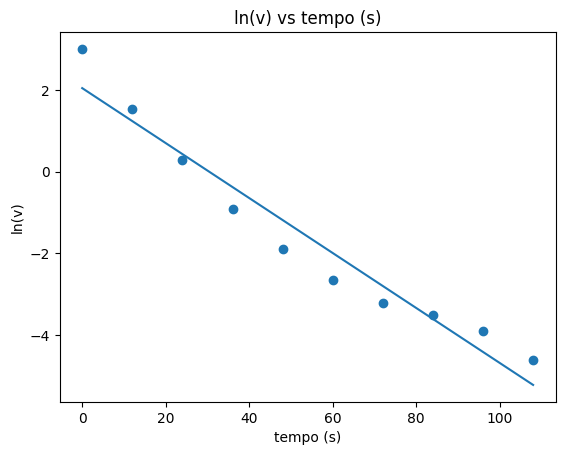

In [33]:
plt.scatter(tempo,np.log(dados["primeira gravação"]))
plt.plot(tempo,model1.predict(tempo))
plt.title("ln(v) vs tempo (s)")
plt.ylabel("ln(v)")
plt.xlabel("tempo (s)")

In [36]:
print(f'coeficiente angular: {model1.coef_}')
print(f'coeficiente linear: {model1.intercept_}')
print(f'coeficiente de determinação (R²): {r2_score(np.log(dados["primeira gravação"]),model1.predict(tempo))}')

coeficiente angular: [-0.06730335]
coeficiente linear: 2.045725797652626
coeficiente de determinação (R²): 0.9457096055346439


In [60]:
model = LinearRegression()
logmedia = np.log(media)
model.fit(tempo,logmedia)

LinearRegression()

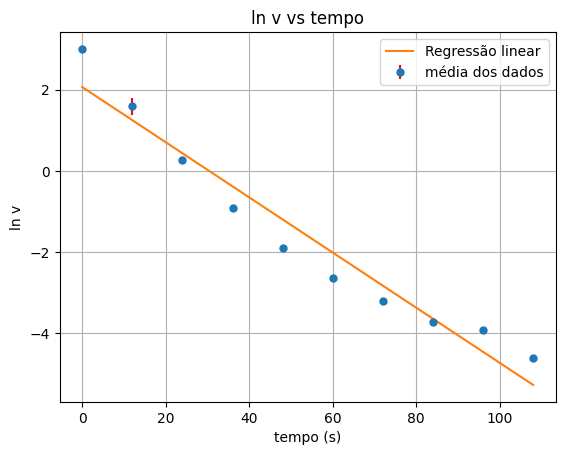

In [74]:
mediaerr = np.array([0,0.2,.01,.01,.004,.004,0,.005,0,0])
plt.errorbar(tempo,logmedia,yerr=mediaerr,fmt='o',markersize=5,ecolor='red',label="média dos dados")
plt.plot(tempo,model.predict(tempo),label="Regressão linear")
plt.title("ln v vs tempo")
plt.ylabel("ln v")
plt.xlabel("tempo (s)")
plt.grid()
plt.legend()

In [62]:
print(f'coeficiente angular: {model.coef_}')
print(f'coeficiente linear: {model.intercept_}')
print(f'coeficiente de determinação (R²): {r2_score(logmedia,model.predict(tempo))}')

coeficiente angular: [-0.06799026]
coeficiente linear: 2.065659224472435
coeficiente de determinação (R²): 0.9464760078765265
